### The Josephson effect,
TMA4230, project 2

Group 3685

In [1]:
# Importing modules
import numpy as np
import numpy.typing as npt
from collections.abc import Callable
from scipy.integrate import solve_bvp
from scipy.integrate import simpson
import matplotlib.pyplot as plt
import time

## Exercise 1
### 1a)

We want to solve the initial value problem 

$$
\frac{d^2y}{dx^2} = -4\cdot \sin(2x), \quad y(0)=0, \quad y'(0) = 2\text{.}$$

We begin by integrating both sides twice. First, we obtain

$$
\frac{dy}{dx} = 4\cdot \frac{1}{2} \cos(2x) + C_1 =2\cos(2x) + C_1 \text{.}
$$

Thereafter, we obtain

$$
y(x) = \sin(2x) + C_1x + C_2 \text{.}
$$

The first initial condition gives us 

$$
y(0) = \sin(2\cdot 0) + C_1\cdot 0 + C_2 \Rightarrow C_2 = 0.
$$

We know the derivative from above, and put in the second initial condition as well. We get 

$$
y'(0) = 2\cos(2\cdot 0) + C_1 = 2 \Rightarrow 2\cdot 1 + C_2 = 2 \Rightarrow C_2 = 0 \text{.}
$$

This gives the solution

$$
y(x) = \sin(2x).
$$


### 1b) 

We proceed by rewriting the second-order ODE from part 1a) into two first-order ODEs forWe proceed by rewriting the second-order ODE from part 1a) into two first-order ODEs for

$$\vec{y}(x) = \begin{bmatrix}
y(x) \\
y'(x)
\end{bmatrix}.$$ 

We get

$$
\frac{d\vec{y}}{dx} = \begin{bmatrix}
y'(x) \\
-4\cdot \sin(2x)
\end{bmatrix}, \quad 

\vec{y}(0) = \begin{bmatrix}
0 \\
2
\end{bmatrix}.
$$

## 1c)

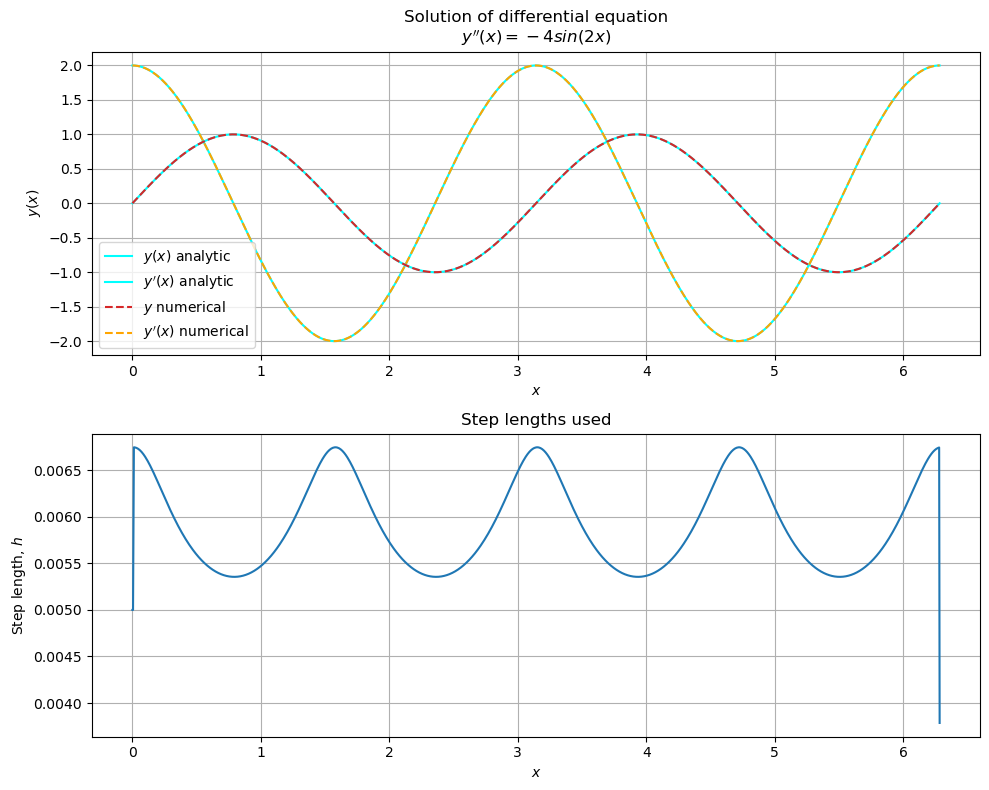

In [2]:
# Defining functions

def y_anl_1(x: npt.NDArray[np.float64]) -> npt.NDArray[np.float64]:
    '''
    Analytic solution for the vector y in task 1.
    INPUT
        x:      (?,) NDArray (1D array with x values)
    OUTPUT
        y:      (?,2) NDArray (2D array with the analytic 
                solution [y(x), y'(x)])
    '''
    return np.transpose(np.array([np.sin(2*x), 2*np.cos(2*x)]))

def f_1c(x: float, y: npt.NDArray[np.float64]) -> npt.NDArray[np.float64]:
    '''
    OUTPUT
        y:  (2,) NDArray (1D array)
    '''
    return np.array([y[1], -4*np.sin(2*x)])

def RK32(x_init: float, x_end: float, y_init: npt.NDArray[np.float64], 
         f: Callable, h0: float, tol: float, α: float
         ) -> tuple[npt.NDArray[np.float64], npt.NDArray[np.float64], 
        npt.NDArray[np.float64], npt.NDArray[np.float64], int]: 
    '''
    INPUT
        y_init:     2D array of initial values for y: [y(x_init), y'(x_init)]
        f:          the derivative of y
        h0:         initial step length
        tol:        maximum error tolerated
        α:      pessimist factor to make the step lenght h a bit 
                    smaller than calculated
    OUTPUT
        y: (?,?) NDArray (2D array with y(x_n) on row n)
        x: (?,?) NDArray (1D array with x-values)
        h: (?,) NDArray (1D array of step lengths)
        N: int (total numbers of steps taken)
    ''' 
    h, N = h0, 0
    x_lst, y_lst, h_lst = [x_init], [y_init], [h0]
    k1 = f(x_init, y_init)

    while (x_end - x_lst[-1]) > 1e-15:                              # In other words: while x_n < x_end
        N += 1                                                      # Count number of loops
        x, y = x_lst[-1], y_lst[-1].copy()                          # We use the last list element for calculating the subsequent
        h = np.min([h, x_end-x])                                    # Ensures we do not calculate y-values for x>x_endh=np.min(h,x_end-x)                             # Assures we do not calculate y-values for x>x_end
        k2 = f(x + 0.5*h, y + 0.5* h * k1)
        k3 = f(x + 0.75*h, y + 0.75* h * k2)
        y += (1/9) * h * (2*k1 + 3*k2 + 4*k3)                       # Update y
        x += h                                                      # Update x
        k4 = f(x, y)                                                # k4 uses the new values for x and y
        z = y_lst[-1] + (1/24) * h*(7*k1 + 6*k2 + 8*k3 + 3*k4)
        est = np.linalg.norm(y-z)                                   # Calculate the error (norm)
        if est<tol:                                                 # If the error is tolerated, we may use the values for y, (and update k1)
            k1 = k4 
            x_lst.append(x)
            y_lst.append(y.copy()) 
            h_lst.append(h)                                         # k4 can be reused as k1 in the next loop
        h *= α*(tol/est)**(1/3)                                     # h is updated with the same formula whether or not the values were accepted
    return np.array(x_lst), np.array(y_lst), np.array(h_lst), N     # Returning numpy arrays
    
# Defining constants
x_init = 0
x_end = 2*np.pi
y_init = np.array([0,2],dtype=np.float64)
h0 = 0.005
tol = 1e-7
α = 0.8

x_arr, y_arr, h_arr, N = RK32(x_init, x_end, y_init, f_1c, h0, tol, α)

# Plotting
fig_1c, ax_1c = plt.subplots(2,1,figsize=(10,8))
ax_1c[0].plot(x_arr, np.sin(2*x_arr), color="cyan",label='$y(x)$ analytic')
ax_1c[0].plot(x_arr, 2*np.cos(2*x_arr), color="cyan",label="$y'(x)$ analytic")
ax_1c[0].plot(x_arr,y_arr[:,0],color="tab:red",linestyle="--",label='$y$ numerical')
ax_1c[0].plot(x_arr,y_arr[:,1],color="orange",linestyle="--",label="$y'(x)$ numerical")
ax_1c[0].set_title("Solution of differential equation\n$y''(x)=-4sin(2x)$")
ax_1c[0].set_xlabel('$x$')
ax_1c[0].set_ylabel('$y(x)$')
ax_1c[0].legend()
ax_1c[0].grid()

ax_1c[1].plot(x_arr,h_arr)
ax_1c[1].set_title("Step lengths used")
ax_1c[1].set_xlabel('$x$')
ax_1c[1].set_ylabel('Step length, $h$')
ax_1c[1].grid()

plt.tight_layout()
plt.show()

In the first plot, we see that the analytical and numerical graphs overlap, meaning the Runge Kutta method seems to give an accurate solution.

In the second plot we see that the step lengths $h$ are the largest when the $\lvert y'(x) \rvert$ is the largest, and the smallest when $\lvert y'(x) \rvert$ is the smallest. 
That is because when the derivative has the largest absolute value, $y(x)$ can be approximated as a linear function. 
When one has a linear function with a constant derivative, it is possible to take an infinitely long step (assuming it is in the correct direction) and get out the exact function. Since the derivative is constant, there is no need to reevaluate the direction of the step and it is therefore more computationally efficient to take one large step rather than many small ones. 
However, when the derivative is close to zero, i.e. when $y(x)$ approaches an extremum, the direction of the next step changes rapidly, and it therefore pays off to make $h$ smaller to reduce the error. 
This explains the wave-like form of $h(x)$; a large $\lvert y'(x) \rvert$ makes a larger $h$ more computationally "profitable", while a small $\lvert y'(x) \rvert$ requires a smaller $h$ for the sake of accuracy.

### 1d)

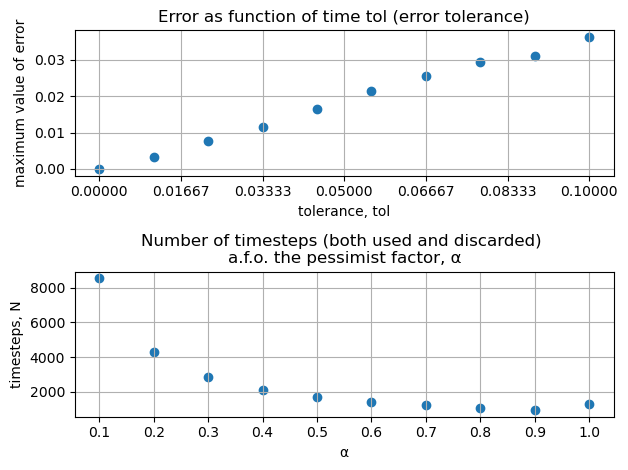

In [3]:
def error_afo_tol(x_init: float, x_end: float, y_init: npt.NDArray[np.float64], 
                  f: Callable, h0: float, tol: npt.NDArray[np.float64], 
                  α: float, f_anl: Callable) -> npt.NDArray[np.float64]:
    '''
    Calculates the mean error for a goiven function y

    INPUT
        y_init:     2D array of initial values for y: [y(x_init), y'(x_init)]
        f:          the derivative of y
        h0:         initial step length
        tol:        array of maximum error tolerated
        α:      pessimist factor to make the step length h a bit smaller 
                    than calculated
        y_anl:      analytic function for y
    OUTPUT
        err_arr:      Maximum error array for different tolerances
    '''
    err_arr = np.zeros(len(tol))
    for i in range(len(tol)):
        x_arr, y_arr, h_arr, N = RK32(x_init, x_end, y_init, f, h0, tol[i], α)
        y_anl = f_anl(x_arr)
        err_max = np.max(np.abs((y_arr[:,0] - y_anl[:,0])))
        err_arr[i] = err_max
    return err_arr

def N_timesteps_afo_α(x_init: float, x_end: float, 
                          y_init: npt.NDArray[np.float64], f: Callable, 
                          h0: float, tol: float, α: npt.NDArray[np.float64]) -> npt.NDArray[np.float64]:
    '''
    INPUT
        y_init:     2D array of initial values for y: [y(x_init), y'(x_init)]
        f:          the derivative of y
        h0:         initial step length
        tol:        maximum error tolerated
        α:      array of pessimist factors to make the step lenght h a 
                    bit smaller than calculated
    OUTPUT
        N: time steps for each α
    '''
    N_timesteps_array = np.zeros(len(α))
    for i in range(len(α)):
        x_arr, y_arr, h_arr, N_timesteps = RK32(x_init, x_end, y_init, f, h0, tol, α[i]) # The function count the number of times the while loop is running
        N_timesteps_array[i] = (N_timesteps)
    return N_timesteps_array

# Parameters for errorplot and timestep-plot:
x_init = 0
x_end = 2*np.pi
y_init = np.array([0,2],dtype=np.float64)
h0 = 0.0003
tol_arr = np.linspace(1e-7,1e-1,10)
tol = 1e-7
α = 0.8
α_arr = np.linspace(0.1,1.0,10)

# Values errorplot:
error_arr = error_afo_tol(x_init, x_end, y_init, f_1c,h0, 
                          tol_arr, α, y_anl_1)
# Values timestep-plot:
N_timesteps_arr = N_timesteps_afo_α(x_init, x_end, y_init, f_1c,h0, 
                                        tol, α_arr)

# Plotting errorplot
fig_1d,ax_1d=plt.subplots(2,1)
ax_1d[0].scatter(tol_arr, error_arr)
ax_1d[0].set_title('Error as function of time tol (error tolerance)')
ax_1d[0].set_xlabel('tolerance, tol')
ax_1d[0].set_ylabel('maximum value of error')
ax_1d[0].set_xticks(np.linspace(tol_arr[0], tol_arr[-1], 7))
ax_1d[0].grid()

# Plotting timestep-plot
ax_1d[1].scatter(α_arr, N_timesteps_arr)
ax_1d[1].set_title('Number of timesteps (both used and discarded) \na.f.o. the pessimist factor, α')
ax_1d[1].set_xlabel('α')
ax_1d[1].set_ylabel('timesteps, N')
ax_1d[1].set_xticks(α_arr)
ax_1d[1].grid()

plt.tight_layout()
plt.show()


The first figure shows the maximum error as a function of tolerance. From what we see in the plot, it seems that the error increases linearly for larger tolerance. This is expected, as a larger tolerance implies that the simulation will tolerate larger absolute differences between the calculated values of $y$ for our second order ODE, and for the third order ODE.

<br>

The second figure shows the number of timesteps used by Runga-Kutta function, given some value $\alpha$, where $\alpha$ is the pessimist factor. This factor ensures that $h_{new}$ is smaller than the current $h$, ensuring that the calculated value $y$ falls within the tolerance. In the figure, we see that the gradient is steep at first, but decreases quickly as $\alpha$ is increased, meaning that the number of timesteps required falls off quickly for small $\alpha$ as $\alpha$ is increased. This is because $\alpha \propto h$, so that when alpha is increased, the size of the timestep is increased. As such, the number of timesteps needed decreases.

Almost all of the timesteps are accepted for small values of $\alpha$. For larger $\alpha$, fewer steps are accepted, i.e. more get rejected. It therefore makes sense that the trend flattens out (and does not decrease linearly) as $\alpha$ increases. 

As we can see in the figure, it reaches a minimum around $\alpha = 0.9$. The minimum occurs when the step size is so large that only a small number of them are required, while also being small enough to accept the majority of the timesteps. 

For $\alpha$ close to $1$, the gradient is positive because the timestep sizes are too large. Steps must therefore be discarded, and recalculated, resulting in the Runge-Kutta requiring additional steps. 

In conclusion, to optimise the simulation, we want to minimise the number of steps, and tehrefore, should choose $\alpha \approx 0.9$.  

### 1e)

g(z) = -8.445718235883248e-09
z = -0.45662470817927825


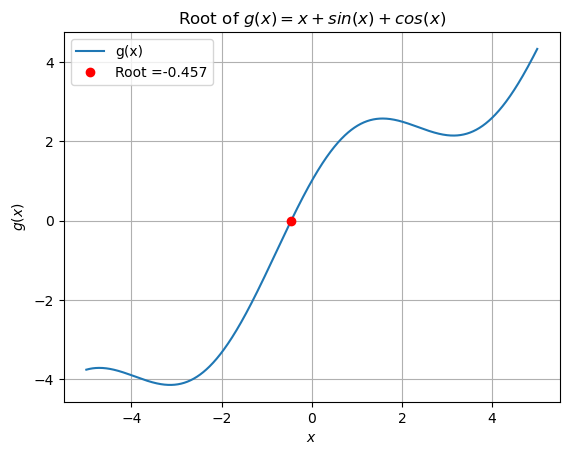

In [4]:
def secant_method(z0: float, z1: float, g: Callable, tol=0.001):
    '''
    Finds root of function g

    INPUT
        z0: float, initial guess 1
        z1: float, initial guess 2
        g: function. The function for which we want to find a root
        tol: float, tolerance
    OUTPUT
        z[-1]: float. The root of g, the z value for which g(z[-1]) = 0
    '''
    z = [z0, z1] 

    while tol < np.abs(z[-2] - z[-1]):
        if g(z[-1]) - g(z[-2]) == 0:  # Avoid division by zero
            print("Secant method failed (division by zero).")
            return None
        
        zi = (z[-2] * g(z[-1]) - z[-1] * g(z[-2])) / (g(z[-1]) - g(z[-2]))
        z.append(zi)

    return z[-1]

def g(x):
    return x + np.sin(x) + np.cos(x)

x=np.linspace(-5,5,1000)
z = secant_method(-1, 4, g)

print("g(z) =", g(z))
print("z =", z)

plt.plot(x, g(x), label="g(x)")
plt.plot(z, g(z), 'ro', label="Root ="+str(round(z,3)))
plt.title("Root of $g(x)=x+sin(x)+cos(x)$")
plt.ylabel("$g(x)$")
plt.xlabel("$x$")
plt.grid()
plt.legend()
plt.show()

The figure shows a plot of the funtion $g(x) = x + \sin(x) + \cos(x)$ alongside the root that the secant root finder found $z_0$ at $x = - 0.46$. We can confirm that $z_0$ is indeed a root by finding $g(z_0)$. In this case, $g(z_0) = -8.45 \times 10^{-9} \approx 0$. 

### 1f) 

In this task, we will solve the boundary value problem

$$
\frac{d^2y}{dx^2} = -4 \cdot \sin(2x), \quad y(0) = 0, \quad y(2\pi) = 0.
$$

Just like before, we define 

$$
\vec{y} :=
\begin{bmatrix}
y(x) \\
y'(x)\\
\end{bmatrix},
$$

and 
$$
f(\vec{y}, x) := \frac{d\vec{y}}{dx} = \begin{bmatrix}
y'(x) \\
-4\cdot\sin(2x)\\
\end{bmatrix}
.$$

We must now find a $b:=y'(0)$ so the following boundary conditions 
$$
y_b(0)=y_b(2\pi)=0 \tag{1}
$$ 

are satisfied. 

The process is as follows. We initiate a guess for $b$, and use the Runga-Kutta method to approximate to the IVP condition $y'(x) = b$, which returns $y(x_{end})$. The secant method will repeat in a loop till some value of $b$ that satisifes (1) is found, within a given tolerance. 


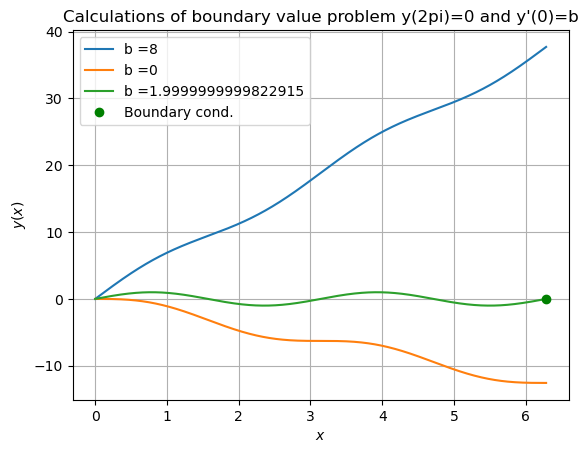

In [6]:
# Defining quantities for RK32
h0 = 0.005
tol = 1e-7
α = 0.8
x_init = 0              # Starting position
x_end = 2*np.pi         # End position
b0 = 0 # Guess 1
b1 = 8 # Guess 2

prev_b=[]               # List for storing b-values that have already been plotted.
                        # Comes in handy for the function below.

def BVP_solver(root_finder, IVP_solver, b0, b1, x_init, x_end, f, h0, tol, α, plot=False):
    '''
    Solves BVPs as an IVP, given y_init=0

    INPUT:
        root_finder:    Callable that finds x for which y(x)=0
        IVP_solver:     Callable that solves IVP
        b0:             initial guess for root  
        b1:             second initial guess for root
        f:              function that derivates y for IVP
        h0:             initial step length in IVP
        tol:            maximum error tolerated in IVP
        α:              pessimist factor to adjust step length in IVP
        plot:           ir True, plot the solutions found with different vaues for b

    OUTPUT: 
        y: (?,?) NDArray (2D array with y(x_n) on row n)
        x: (?,?) NDArray (1D array with x-values)
        h: (?,) NDArray (1D array of step lengths)
        N: int (total number of steps taken in final solution)
    '''
    
    def IVP_solver_root_finder(b):

        y_init = np.array([0,b],dtype=np.float64)
        x_arr, y_arr, h_arr, N = IVP_solver(x_init, x_end, y_init, f, h0, tol, α)

        if plot:
            if b not in prev_b:  # If y(x) with this b has not been plotted yet...
                plt.plot(x_arr,y_arr[:,0], label='b ='+str(b))  # ...then plot it...
                prev_b.append(b)                                # ... and store b-value.

        return y_arr[-1,0]
        
    b = root_finder(b0, b1, IVP_solver_root_finder, tol=0.01)
    y_init_new = np.array([0,b],dtype=np.float64)
    
    return IVP_solver(x_init, x_end, y_init_new, f, h0, tol, α)

BVP_solver(secant_method, RK32, b0, b1, x_init, x_end, f_1c, h0, tol, α, plot=True)

#Plotting 
plt.title("Calculations of boundary value problem y(2pi)=0 and y'(0)=b")
plt.xlabel('$x$')
plt.ylabel('$y(x)$')
plt.plot(2*np.pi,0, 'go', label='Boundary cond.') # Marking where we want end point to be
plt.grid()
plt.legend()
plt.show()

The figure shows the solutions to the BVP. The BVP is solved as an IVP using the Runga-Kutta mehtod for varying values of $b$, where $b$ is found using the secant_method function. The secant_method rapidly converges to $b=2$.

### 1g)
We solve the BVP given by 
$$
\frac{d^2y}{dx^2} = y(x)+\sin(x), 
\quad y(0)=y(12)=0 \tag2
$$

using the IVP-solver and root finder from the previous tasks.  

First, we repeat the steps in 1f); define the 2D vector

$$
\vec{f}=
\begin{bmatrix}
y'(x) \\
y(x) + sin(x)
\end{bmatrix} \text{.}
$$

Then, reformulate the our BVP into an IVP that may solved numerically. Our initial values are then

$$
y_b(0)=y_b(12)=0 \text{.}
$$


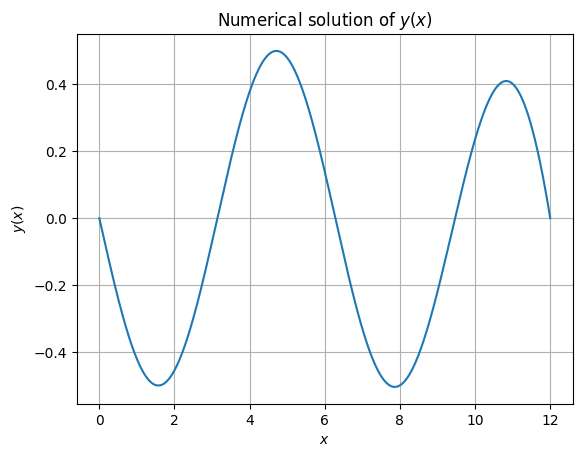

In [7]:
def f_1g(x: float, y: npt.NDArray[np.float64]) -> npt.NDArray[np.float64]:
    '''
    OUTPUT
        y: (2,) NDArray (1D array)
    '''
    return np.array([y[1], y[0] + np.sin(x)])

# Defining params
h0 = 0.005
tol = 1e-7
α = 0.8
x_init = 0              # Starting position
x_end = 12              # Ending position

b0 = 0                  # Initial guess 0
b1 = 8                  # Initial guess 1

start_g = time.perf_counter() # Measuring time for later use

x_arr_g, y_arr_g, h_arr_g, N_g = BVP_solver(secant_method, RK32, b0, b1, x_init, x_end, f_1g, h0, tol, α)

stop_g = time.perf_counter()

runtime_g = start_g - stop_g

plt.plot(x_arr_g, y_arr_g[:,0])
plt.xlabel("$x$")
plt.ylabel("$y(x)$")
plt.title("Numerical solution of $y(x)$")
plt.grid()
plt.show()

The graph shows the numerically calulated solution for $y(x)$ plotted for $x$, given the BVP described in (2). The solution appears to be an altered negative sinusodial wave. If the BVP was analytically integrated twice, you would see a corresponding negative sinus function in the function, which strengthens the validity of the numerical solution. 

### 1h)

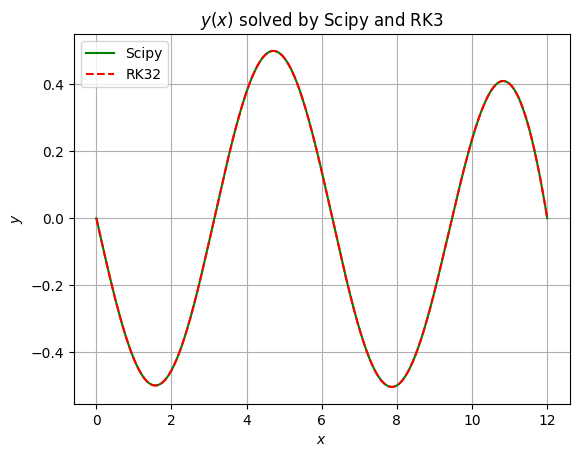

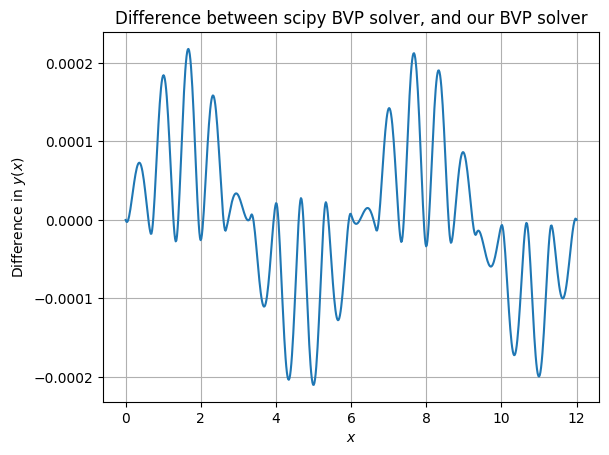

Scipy's BVP was faster than our solver by 4.821014999994077 seconds


In [8]:
# Defining constants and variables
x_init = 0
x_end = 12
x = np.linspace(x_init, x_end, 10)      # Initial x-mesh
y = np.zeros((2, x.size))               # Boundaries for y, 2D array, x rows.
start_h = time.perf_counter()           # Timing scipy BVP solver

# Solving BVP with scipy
def bc(ya, yb): # Ensures y(0)=0, y(12)=0
    return np.array([ya[0], yb[0]])

y_solution = solve_bvp(f_1g, bc, x, y) # Scipy solver
y_h = y_solution.sol(x_arr_g)[0] # Fetches solution for y(x). Allows integrated interpolation for smoother plots.

stop_h = time.perf_counter() 

diff_arr = (y_h - y_arr_g[:,0]) # Absolute differences between 1g and 1h solutions

# Plotting:
plt.plot(x_arr_g, y_h, 'g', label="Scipy")
plt.plot(x_arr_g, y_arr_g[:,0], 'r--', label="RK32")
plt.title("$y(x)$ solved by Scipy and RK3")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.grid()
plt.show()

plt.plot(x_arr_g, diff_arr)
plt.title("Difference between scipy BVP solver, and our BVP solver")
plt.xlabel("$x$")
plt.ylabel("Difference in $y(x)$")
plt.grid()
plt.show()

print(f"Scipy's BVP was faster than our solver by {start_h - stop_h - runtime_g} seconds")

In the first figure, we have plotted the solution to eq. (2) for both the Scipy BVP solver module,  and the IVP solver and root finder from 1g). The solutions appears to be identical. 

The second figure shows the absolute differences between the two BVP solvers as a function of $x$. The The difference appears to be of order $10^{-3}$ smaller than the actual values of $y(x)$, and is therefore negligible. Notice that the difference function mimics the inverted solution, with a small delay in peaks. This may come from the different solvers' applying different formulas for adaptive step length. 

In conclusion, by considering the time difference between Scipy's BVP solver and our solver, it is optimal to use Scipy's BVP solver. While the time difference is not considerably large in this problem, we should expect a longer runtime for more complicated problems that require more iterations. 

### 2a)

In [9]:
def matrix_to_vector(matrix):
    '''
    Transforms a 2x2 complex matrix into a 8-component real vector as 
    specified in task 2a.

    INPUT
        matrix: (2,2) N_array
    
    OUTPUT
        vector: (1,8) N_array
    
    '''
    assert matrix.shape == (2,2)
    vector = np.zeros(8)
    flat_matrix =matrix.reshape(1,4)[0]  # Reshaping matrix into (1,4) array 
                                         # with ax=0
    vector[0:4] = np.real(flat_matrix)
    vector[4:8] = np.imag(flat_matrix)
    return vector

def vector_to_matrix(vector):
    '''
    Does the exact same thing as the unction above only backwards. 
    Transforms one 8-component vector into a (2x2) matrix
    '''
    assert vector.size == 8
    matrix=np.zeros((2,2), dtype=np.complex128)   # Default dtype is float. 
                                                # Convert to complex
    matrix[0,0] = complex(vector[0],vector[4])  # a=complex(1,2) -> a=1+2.j
    matrix[0,1] = complex(vector[1],vector[5])
    matrix[1,0] = complex(vector[2],vector[6])
    matrix[1,1] = complex(vector[3],vector[7])
    return matrix

M = np.array([[1+2j, 3+4j], [5+6j, 7+8j]])  # Make a random complex 2x2 matrix
vector = matrix_to_vector(M)    # Vector as specified in project description
N = vector_to_matrix(vector)    # Transform vector back into a 2x2 matrix
result = (N==M)
print(all(result.reshape(1,4)[0]))          # See if all elements are True

True


To determine whether the matrix_to_vector function transforms $2\times2$ matrices into $8$-component vectors, and that the vector_to_matrix function does the oppoiste, we do as follows. 

First, we create an arbitrary complex $2\times2$ matrix $\bold{M}$. Then, $\bold{M}$ is fed into matrix_to_vector to obtain a vector $v$. This vector is fed into vector_to_matrix. The output will be a new $2\times2$ matrix, $\bold{N}$. To confirm that the code simply converts between $2\times2$ matrices and $8$-component vectors, we check that $\bold{M = N}$. If this is the case, the code returns 'True'.

### 2b)

In [10]:
def m_vectors_to_v(m1, m2, m3, m4):
    '''
    Turns four 8-component vectors m1, m2, m3, m4 into one 32-component vector v.
    Assumption: The four first numbers in the m-vectors are real values from 
    matrix in task 2a.
    When making v, the real values are grouped in the first 16 slots, 
    and the imaginary are grouped in the last 16 slots.

    INPUT
        m1, m2, m3, m4: (1,8) N_arrays
    OUTPUT
        v: (1,32) N_array
    
    '''
    assert (m1.size, m2.size, m3.size, m4.size) == (8, 8, 8, 8)

    # Merging arrays as explained above
    v = np.concatenate((m1[0:4], m2[0:4], m3[0:4], m4[0:4],
                        m1[4:8], m2[4:8], m3[4:8], m4[4:8])) 
    return v

def v_to_m_vectors(v):
    '''
    Does the exact opposite of the function above. Turns a 32-component vector v into 
    four 8-component vectors m

    INPUT
        v: (1,32) N_array
    OUTPUT
        m1, m2, m3, m4: (1,8) N_arrays
    
    '''
    assert v.size == 32
    m1 = np.concatenate((v[0:4], v[16:20]))
    m2 = np.concatenate((v[4:8], v[20:24]))
    m3 = np.concatenate((v[8:12], v[24:28]))
    m4 = np.concatenate((v[12:16], v[28:32]))
    return m1, m2, m3, m4

# Defining vectors
m1 = np.array([1, 2, 3, 4, 1, 2, 3, 4])
m2 = np.array([5, 6, 7, 8, 5, 6, 7, 8])
m3 = np.array([9, 10, 11, 12, 9, 10, 11, 12])
m4 = np.array([13, 14, 15, 16, 13, 14, 15, 16])

# Transforming
v = m_vectors_to_v(m1, m2, m3, m4)
print("v=",v)
m_reconstructed = v_to_m_vectors(v)
print(" m1=",m_reconstructed[0],"\n m2=",m_reconstructed[1],"\n m3=",m_reconstructed[2],"\n m4=",m_reconstructed[3])

# Checking and printing result
assert np.allclose((m1, m2, m3, m4), m_reconstructed), "m_vectors_to_v and v_to_m_vectors do not execute inverse transformations"
print("m_vectors_to_v and v_to_m_vectors are indeed inverse transformations")

v= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16  1  2  3  4  5  6  7  8
  9 10 11 12 13 14 15 16]
 m1= [1 2 3 4 1 2 3 4] 
 m2= [5 6 7 8 5 6 7 8] 
 m3= [ 9 10 11 12  9 10 11 12] 
 m4= [13 14 15 16 13 14 15 16]
m_vectors_to_v and v_to_m_vectors are indeed inverse transformations


To ensure that our functions appropriately change four $8$-component real vectors into a $32$-complement vector, they are first applied and then printed. 

For an arbitrary input vector, applying followed by the other yield our original input vector. The functions are then true inverses of one another.

The steps are as follows. First we define our arbitrary $8$-component vectors. Then, use m_vectors_to_v to the vector to get a $32$-component vector. This vector is printed as fed into v_to_m_vectors. The final output from v_to_m_vectors is our initial four $8$-component vectors.

### 2c)

In [11]:
def matrices_to_v(ɣ, ɣ_tilde, ω, ω_tilde):
    '''
    Converts four (2x2) matrices into a 32-component vector
    '''
    assert (ɣ.shape, ɣ_tilde.shape, ω.shape, 
            ω_tilde.shape) == ((2, 2),(2, 2),(2, 2),(2, 2))
    
    g1 = matrix_to_vector(ɣ)
    g2 = matrix_to_vector(ɣ_tilde)
    o1 = matrix_to_vector(ω)
    o2 = matrix_to_vector(ω_tilde)

    v = m_vectors_to_v(g1, g2, o1, o2)
    return v

def v_to_matrices(v):
    '''
    Converts a 32-component vector into four (2x2) matrices into four 
    matrixes:
    (a_r, b_r, c_r, d_r, e_r, f_r, g_r, h_r, j_r, k_r, l_r, m_r, n_r, o_r, p_r, q_r,
     a_i, b_i, c_i, d_i, e_i, f_i, g_i, h_i, j_i, k_i, l_i, m_i, n_i, o_i, p_i, q_i)
     
     ---->

     ((a_r+i*a_i, b_r+i*b_i), (c_r+i*c_i, d_r+i*d_i)),
     ((e_r+i*e_i, f_r+i*f_i), (g_r+i*g_i, h_r+i*h_i)),
     ((j_r+i*j_i, k_r+i*k_i), (l_r+i*l_i, m_r+i*m_i)),
     ((n_r+i*n_i, o_r+i*o_i), (p_r+i*p_i, q_r+i*p_i))
    '''
    assert v.size == 32
    g1, g2, o1, o2 = v_to_m_vectors(v)
    ɣ = vector_to_matrix(g1)
    ɣ_tilde = vector_to_matrix(g2)
    ω = vector_to_matrix(o1)
    ω_tilde = vector_to_matrix(o2)

    return ɣ, ɣ_tilde, ω, ω_tilde

# Defining four complex matrices
ɣ = np.array([[1+2j,3+4j],[5+6j,7+8j]])
ɣ_tilde = np.array([[9+10j,11+12j],[13+14j,15+16j]])
ω = np.array([[17+18j,19+20j],[21+22j,23+24j]])
ω_tilde = np.array([[25+26j,27+28j],[29+30j,31+32j]])

# Applying transformation funtions
v = matrices_to_v(ɣ,ɣ_tilde,ω,ω_tilde)

M1,M2,M3,M4 = v_to_matrices(v)

# Check if inverse, print result.
assert np.allclose(M1,M2,M3,M4, v_to_matrices(v)), "Functions are not inverse transformations"
print("The functions are inverse transformations.")
print(f"32-component vector after transormation: {v}") # Writes down the components of vector v

The functions are inverse transformations.
32-component vector after transormation: [ 1.  3.  5.  7.  9. 11. 13. 15. 17. 19. 21. 23. 25. 27. 29. 31.  2.  4.
  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30. 32.]


matrices_to_v first 'folds out' the four $2$ x $2$ matrices into four $8$-component vectors by calling on matrix_to_vector from task 2a for each matrix. The function transforms the matrices into vectors as stated in task 2a in the project description:

$$\begin{align*}

\begin{pmatrix}
    a_r+ia_i & b_r+ib_i \\
    c_r+ic_i & d_r+id_i
\end{pmatrix} \rightarrow \begin{pmatrix} a_r & b_r & c_r & d_r & a_i & b_i &c_i & d_i \end{pmatrix}
\\
\\
\begin{pmatrix}
    e_r+ie_i & f_r+if_i \\
    g_r+ig_i & h_r+ih_i
\end{pmatrix} \rightarrow \begin{pmatrix} e_r & f_r & g_r & h_r & e_i & f_i &g_i & h_i \end{pmatrix}
\\
\\
\begin{pmatrix}
    j_r+ij_i & k_r+ik_i \\
    l_r+il_i & m_r+im_i
\end{pmatrix} \rightarrow \begin{pmatrix} j_r & k_r & l_r & m_r & j_i & k_i &l_i & m_i \end{pmatrix}
\\
\\
\begin{pmatrix}
    n_r+in_i & o_r+io_i \\
    p_r+ip_i & q_r+iq_i
\end{pmatrix} \rightarrow \begin{pmatrix} n_r & o_r & p_r & q_r & n_i & o_i &p_i & q_i \end{pmatrix}

\end{align*}$$

These four vectors are then transformed into a $32$-component vector $\vec{v}$ so that the real parts of the matrices are placed first, and the imaginary parts last:

$$\begin{align*}

\vec{v}=\begin{pmatrix} a_r \\ b_r \\ c_r \\ d_r \\ e_r \\ f_r \\ g_r \\ h_r \\ j_r \\ k_r \\ l_r \\ m_r \\ n_r \\ o_r \\ p_r \\ q_r \\ a_i \\ b_i \\ c_i \\ d_i \\ e_i \\ f_i \\ g_i \\ h_i \\ j_i \\ k_i \\ l_i \\ m_i \\ n_i \\ o_i \\ p_i \\ q_i \end{pmatrix}^T
\end{align*}$$

### 2d)

In [12]:
δ = 0.01 # Constant 

def N_matrix(ɣ, ɣ_tilde):
    '''
    Creates the matrix N as specified in project description.

    INPUT
        ɣ:       (2,2) N_array
        ɣ_tilde: (2,2) N_array
    
    OUTPUT
        N:           (2,2) N_array
    '''
    # Making all matrices complex to avoid problems with dtype
    ɣ, ɣ_tilde = ɣ.astype(complex), ɣ_tilde.astype(complex)

    I = np.array([[1,0], [0,1]]).astype(complex) # Identity matrix
    N = I - ɣ @ ɣ_tilde
    a, b, c, d = N[0,0], N[0,1], N[1,0], N[1,1]
    N = ( 1 / (a*d - b*c) ) * np.array([[d, -b], [-c, a]]) #Inverting the matrix
    return N

def N_tilde_matrix(ɣ, ɣ_tilde):
    '''
    Creates the matrix N_tilde as specified in project description.
    This is exactly the same function as N_matrix except that ɣ and ɣ_tilde 
    switch places in einsum
    '''
    ɣ, ɣ_tilde = ɣ.astype(complex), ɣ_tilde.astype(complex)

    I = np.array([[1,0],[0,1]]).astype(complex)
    N = I - ɣ_tilde @ ɣ
    a, b, c, d = N[0,0], N[0,1], N[1,0], N[1,1]
    N = ( 1 / (a*d - b*c) ) * np.array([[d, -b],[-c, a]]) #Inverting the matrix
    return N

def diff_v(v,ε):
    '''
    Differentiates vector v. 
    Converts v into four matrices (ɣ, ɣ_tilde, ω, ω_tilde), that are differentiated 
    as per eq. (9)-(12) in the project description. The differentiated matrices 
    are then transformed back into a 32-component vector dv.
    Test code:
        ε = 2
        ɣ = np.array([[1+2j, 3+4j], [5+6j, 7+8j]])
        ɣ_tilde = np.array([[9+10j, 11+12j], [13+14j, 15+16j]])
        ω = np.array([[17+18j, 19+20j], [21+22j, 23+24j]])
        ω_tilde = np.array([[25+26j,27+28j],[29+30j,31+32j]])
        v = matrices_to_v(ɣ,ɣ_tilde,ω,ω_tilde)
        dv = diff_v(v,ε)
        print(dv)
        
    INPUT (do not change input variables, they are specified in project desc.)
        v:        (1,32) N_array
        ε:  Float. Dimensionless energy quantity

    OUTPUT
        dv:      (1,32) N_array. Derivative of v
    
    '''
    ɣ, ɣ_tilde, ω, ω_tilde = v_to_matrices(v)
    N, N_tilde = N_matrix(ɣ, ɣ_tilde), N_tilde_matrix(ɣ, ɣ_tilde)
    dω = complex(0,-2) * complex(ε,δ) * ɣ - 2 * ω @ N_tilde @ ɣ_tilde @ ω
    dω_tilde = complex(0,-2) * complex(ε, δ) * ɣ_tilde - 2 * ω_tilde @ N @ ɣ @ω_tilde
    dv = matrices_to_v(ω, ω_tilde, dω, dω_tilde)
    return dv

### 2e)

In [13]:
def fun_for_bvp(x, vec, ε = 2):
    '''
    INPUT
        x:      (1,m) NDArray. Positions in interval [0,l] where l is the length 
                of the metal that we are studying.

        vec:    (32,m) NDArray. m different v-vectors for each position x.
                A vector v represents four "rolled out" matrices: 
                ɣ, ɣ_tilde, ω, ω_tilde, which is what we are trying to find.

    O UTPUT
        dv_arr: (32,m) NDArray. An array of the derivatives of the v-vectors in vec.
    '''
    
    dv_arr = np.zeros((vec.shape[0], vec.shape[1]))
    for i in range (vec.shape[1]):
        dv_arr[:,i] = diff_v(vec[:,i], ε)  # Differentiate each column (vector v)
    return dv_arr


### 2f)

In [14]:
def bc_for_bvp_2f(v_left, v_right, ε = 2, length = 1, φ_L =0, φ_R=0):
    '''
    Calculates how far off the solution is from the boundary conditions 
    (eq. 13-16 in project desc.)

    INPUT
        v_left:  (1,32) NDArray. Riccati matrices (ɣ) and their derivatives 
        (ω) in x=0
        v_right: (1,32) NDArray. Riccati matrices (ɣ) and their derivatives 
        (ω) in x=l
    
    OUTPUT
        boundary_condition_res: (1,32) NDArray. Residuals of boundary conditions.
                                Ideally the entire array should be zero, 
                                but numerical solutions may not be perfect.
    
    '''
    ζ = 3 # Constant, as per project description

    ɣ_L = np.zeros((2,2))
    ɣ_tilde_L = np.zeros((2,2))
    ɣ_R = np.zeros((2,2))
    ɣ_tilde_R = np.zeros((2,2))

    #Folding up v_left and v_right into matrices
    ɣ_0, ɣ_tilde_0, ω_0, ω_tilde_0 = v_to_matrices(v_left)
    ɣ_l, ɣ_tilde_l, ω_l, ω_tilde_l = v_to_matrices(v_right)

    I = np.array([[1,0], [0,1]]).astype(complex) # Identity matrix

    #Calculating N-matrices
    N_L = N_matrix(ɣ_L, ɣ_tilde_L)
    N_tilde_L = N_tilde_matrix(ɣ_L,ɣ_tilde_L)
    N_R = N_matrix(ɣ_R, ɣ_tilde_R)
    N_tilde_R = N_tilde_matrix(ɣ_R, ɣ_tilde_R)

    #Partsums to avoid long lines:
    psum_ω_0 = (1 / (ζ * length)) * (I - ɣ_0 @ ɣ_tilde_L)
    psum_ω_l = (1 / (ζ * length)) * (I - ɣ_l @ ɣ_tilde_R)
    psum_ω_tilde_0 = (1 / (ζ * length)) * (I - ɣ_tilde_0 @ ɣ_L)
    psum_ω_tilde_l = (1 / (ζ * length)) * (I - ɣ_tilde_l @ ɣ_R)

    #Calculating eq (13)-(16)
    eq_13 = ω_0 + psum_ω_0 @ N_L @ (ɣ_L - ɣ_0)
    eq_14 = ω_tilde_0 + psum_ω_tilde_0 @ N_tilde_L @ (ɣ_tilde_L - ɣ_tilde_0)
    eq_15 = ω_l - psum_ω_l @ N_R @ (ɣ_R - ɣ_l)
    eq_16 = ω_tilde_l - psum_ω_tilde_l @ N_tilde_R @ (ɣ_tilde_R - ɣ_tilde_l)

    boundary_condition_res = matrices_to_v(eq_13, eq_14, eq_15, eq_16)
    return boundary_condition_res

### 2g)

In [15]:
l = 1                       # Metal piece length
m = 101                     # Number of nodes
x = np.linspace(0,l,m)      # Position
y = np.zeros((32, m))       # Initial guess
ε_arr = np.array([0, 1, 2]) # Different ε guesses
tol = 0.0001                # Tolerance

for eps in ε_arr:  # Finding solution wih solve_bvp for each ε
    # λ function allows us to change ε and l in fun and bc
    sol = solve_bvp(lambda x, vec: fun_for_bvp(x, vec, ε = eps), 
                    bc_for_bvp_2f, x, y)
    not_zero = 0  # Checking how many of the elements in y are non-zero.

    # Set a tolerance limit. With numerical inaccuracy it may not be EXACTLY zero 
    for i in range(32):
        for j in range(m):
            if abs(sol.y[i, j]) > tol:  # Iterate through every element in y and 
                                        # checking whether the absolute value is
                                        # greater than the tolerance
                not_zero += 1

    print("ε = ", eps)
    print("Number of elements in solution that are not numerically equal to zero: ", not_zero,"\n")
    # not_zero = 0, as expected for normal metals

ε =  0
Number of elements in solution that are not numerically equal to zero:  0 

ε =  1
Number of elements in solution that are not numerically equal to zero:  0 

ε =  2
Number of elements in solution that are not numerically equal to zero:  0 



The outputs avobe confirm that all numbers in the solutions are numerically equal to zero.

### 2h)

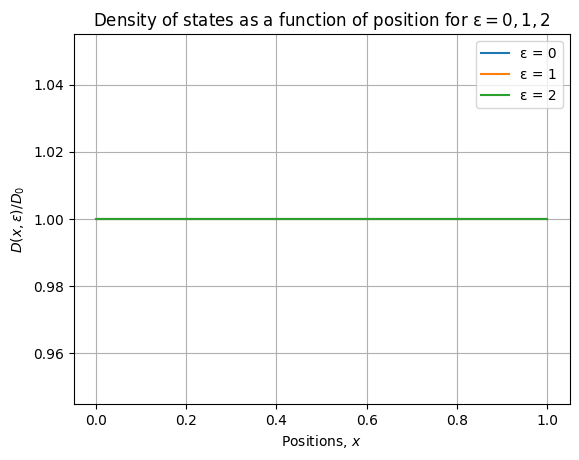

In [16]:
def density_of_states(fun, bc, x, y, eps,l,φ_L=0,φ_R=0):
    '''
    Calcuates the density of states (DOS) as per eq. (19) in project description.

    INPUT
        fun:     Callable. Function for solve_bvp
        bc:      Callable. Evaluation of boundary conditions for solve_bvp
        x:       (1,m) NDArray. Positions/nodes
        y:       (32,m) NDArray. Initial guess
        ε: Double. Dimensionless energy constant

    OUTPUT
        DOS:     (1,32) NDArray. Density of states for different x
        sol:     (32,m) NDArray. Solution calculated by bvp
    '''
    # Finding solution wih solve_bvp
    # λ function allows us to change ε and l in fun and bc
    sol = solve_bvp(lambda x, vec: fun(x,vec,ε=eps), lambda v_left, 
                    v_right: bc(v_left, v_right, ε = eps, length = l,
                                φ_L = φ_L, φ_R = φ_R), x, y)
    
    nodes = sol.x   # Positions
    m = nodes.size  # Number of nodes
    vecs = sol.y    # m vectors of size 32

    I = np.array([[1, 0],[0, 1]]).astype(complex)       # Identity matrix
    zero = np.array([[0, 0],[0, 0]]).astype(complex)    # Zero matrix
    ρ3 = np.block([[I, zero],[zero, -I]])   # 4x4 matrix, specified in project desc. 
                                            # np.block makes one matrix out of several

    DOS = np.zeros(m)                 # DOS = Density of states (value for every x)
    for i in range (m):               # Iterating through every vector in solution
        ɣ, ɣ_tilde, ω, ω_tilde = v_to_matrices(vecs[:,i]) # Unpacking each vector into four matrices
        
        # Defining N matrices:
        N = N_matrix(ɣ,ɣ_tilde)
        N_tilde = N_tilde_matrix(ɣ,ɣ_tilde)

        # Defining each element of Green function and putting them together into one matrix:
        green00 = 2 * N-I
        green01 = 2 * N @ ɣ
        green10 = -2 * N_tilde @ ɣ_tilde
        green11 = -2 * N_tilde + I
        Green = np.block([[green00, green01], [green10, green11]])

        # Calculating DOS as per eq. (19):
        DOS[i] = np.real(np.trace(ρ3 @ Green)) / 4
    return DOS, sol

l = 1                       # Length of piece of metal
m = 101                     # Number of nodes
x = np.linspace(0, l, m)    # Position
y = np.zeros((32, m))       # Initial guess
ε_arr = np.array([0, 1, 2]) # Try for different εs 


# Plotting
for ε in ε_arr:
    DOS, sol=density_of_states(fun_for_bvp, bc_for_bvp_2f, x, y, ε,l)
    plt.plot(x,DOS, label='ε = '+str(ε))
    plt.xlabel('Positions, $x$')
    plt.ylabel('$D(x,ε)/D_0$')
    plt.title('Density of states as a function of position for ε$={0,1,2}$')
    plt.grid()
    plt.legend()

plt.show()


The plot shows that the density of states $D(x,\varepsilon)/D_0=1$ for all positions $x$ and energies $\varepsilon$. 
$D_0$ is defined as the density of states in a normal, non-superconducting metal. As there are no superconductivity involved in this task, one would expect $D(x,\varepsilon)=D_0$ for all positions and energies.

### 2i)

In [17]:
δ = 0.01 # Constant 

# Defining functions from project description:
def θ_sig(σ, ε):
    '''
    INPUT
        σ:   Int. 1 or -1
        ε: Double. Dimensionless energy constant
    
    OUTPUT
        Complex
    '''
    return np.arctanh(σ / complex(ε, δ))

def s_sig(σ, ε):
    '''
    INPUT
        σ:   Int. 1 or -1
        ε: Double. Dimensionless energy constant
    OUTPUT
        Complex
    '''
    return np.sinh(θ_sig(σ, ε))

def c_sig(σ,ε):
    '''
    INPUT
        σ:   Int. 1 or -1
        ε: Double. Dimensionless energy constant
    OUTPUT
        Complex
    '''
    return np.cosh(θ_sig(σ, ε))

φ_L, φ_R = 0,0 # Phase of the left and right superconductor

# Defining Riccati functions of superconductors as per project description:
def interface_Riccati(ε,φ_L,φ_R):
    '''
    INPUT
        ε: Double. Dimensionless energy constant
        φ_L:   Double. Phase of left superconductor
        φ_R:   Double. Phase of right superconductor

    OUTPUT
        ɣ_L:        (2,2) NDArray. Riccati function of left superconductor
        ɣ_tilde_L:  (2,2) NDArray. Riccati function of left superconductor
        ɣ_R:        (2,2) NDArray. Riccati function of right superconductor
        ɣ_tilde_L:  (2,2) NDArray. Riccati function of right superconductor

    '''
    s_plus = s_sig(1, ε) / (1 + c_sig(1, ε))
    s_minus = s_sig(-1, ε) / (1 + c_sig(-1, ε))

    ɣ_L = np.array([[0, s_plus], [s_minus, 0]]) * np.exp(complex(0, φ_L))
    ɣ_tilde_L = np.array([[0, s_minus], [s_plus, 0]]) * np.exp(complex(0, -φ_L))
    ɣ_R = np.array([[0, s_plus], [s_minus, 0]]) * np.exp(complex(0, φ_R))
    ɣ_tilde_R = np.array([[0, s_minus], [s_plus, 0]]) * np.exp(complex(0, -φ_R))
    
    return ɣ_L, ɣ_tilde_L, ɣ_R, ɣ_tilde_R

# making new bc for superconductor interfaces
def bc_for_bvp_2i(v_left, v_right, ε = 2, length = 1, φ_L = 0, φ_R = 0):
    '''
    Calculates how far off the solution is from the boundary conditions 
    (eq. 13-16 in project desc.)

    INPUT
        v_left:  (1,32) NDArray. Riccati matrices (ɣ) and their derivatives (ω) in x=0
        v_right: (1,32) NDArray. Riccati matrices (ɣ) and their derivatives (ω) in x=l
    
    OUTPUT
        boundary_condition_res: (1,32) NDArray. Residuals of boundary conditions.
                                Ideally the entire array should be zero, 
                                but numerical solutions may not be perfect.
    
    '''
    ζ = 3 #Constant, as per project desc.

    ɣ_L, ɣ_tilde_L, ɣ_R, ɣ_tilde_R = interface_Riccati(ε, φ_L, φ_R)

    # Folding up v_left and v_right into matrices
    ɣ_0, ɣ_tilde_0, ω_0, ω_tilde_0 = v_to_matrices(v_left)
    ɣ_l, ɣ_tilde_l, ω_l, ω_tilde_l = v_to_matrices(v_right)

    I = np.array([[1,0], [0,1]]).astype(complex) # Identity matrix

    #Calculating N-matrices
    N_L = N_matrix(ɣ_L, ɣ_tilde_L)
    N_tilde_L = N_tilde_matrix(ɣ_L, ɣ_tilde_L)
    N_R = N_matrix(ɣ_R, ɣ_tilde_R)
    N_tilde_R = N_tilde_matrix(ɣ_R, ɣ_tilde_R)

    #Partsums to avoid long lines:
    psum_ω_0 = (1 / (ζ * length)) * (I - ɣ_0 @ ɣ_tilde_L)
    psum_ω_l = (1 / (ζ * length)) * (I - ɣ_l @ ɣ_tilde_R)
    psum_ω_tilde_0 = (1 / (ζ * length)) * (I - ɣ_tilde_0 @ ɣ_L)
    psum_ω_tilde_l = (1 / (ζ * length)) * (I - ɣ_tilde_l @ ɣ_R)

    #Calculating eq (13)-(16)
    eq_13 = ω_0 + psum_ω_0 @ N_L @ (ɣ_L - ɣ_0)
    eq_14 = ω_tilde_0 + psum_ω_tilde_0 @ N_tilde_L @ (ɣ_tilde_L - ɣ_tilde_0)
    eq_15 = ω_l-psum_ω_l @ N_R @ (ɣ_R - ɣ_l)
    eq_16 = ω_tilde_l - psum_ω_tilde_l @ N_tilde_R @ (ɣ_tilde_R - ɣ_tilde_l)

    boundary_condition_res=matrices_to_v(eq_13, eq_14, eq_15, eq_16)
    return boundary_condition_res

### 2j)

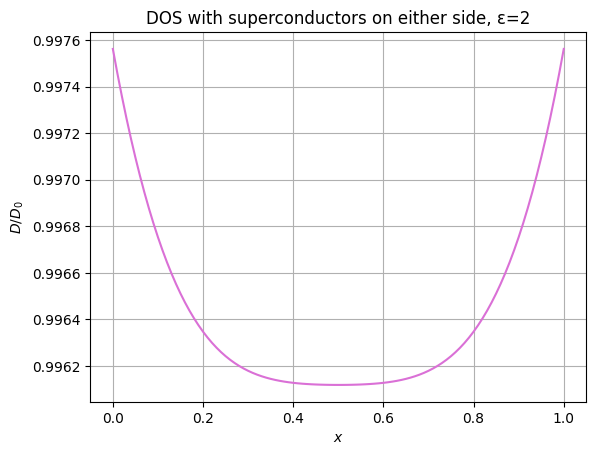

In [18]:
δ =0.01
eps=2

l=1 # Length of piece of metal
m=101 # Number of nodes
x=np.linspace(0,l,m) # Position
y=np.zeros((32,m)) # Initial guess

# Plotting
DOS, sol=density_of_states(fun_for_bvp, bc_for_bvp_2i, x, y, eps,l)
plt.plot(x,DOS,color="orchid")
plt.title("DOS with superconductors on either side, ε=2")
plt.xlabel("$x$")
plt.ylabel("$D/D_0$")
plt.grid()
plt.show()

In this plot we see how the two superconductors on each side of the normal metal affect the density of states within the metal. The energy is set to $\varepsilon=2\frac{E-E_F}{\lvert \Delta \rvert}$, which is generally too high to observe superconducting properties in the normal metal, and we would expect $D(x,\varepsilon)/D_0$ to be around $1$ for all $x \in [0,l]$. Looking at the values on the $y$-axis in the plot, this seems to be the case. The values are only slightly lower than $1$, which could be a result of numerical rounding errors. 

However, the metal is not totally unaffected by the superconductors. The biggest difference between this plot and the plot in task 2h (where there were no superconductors present) is the shape of the graph. In 2h, $D(x,\varepsilon)/D_0$ is constantly equal to $1$ and forms a horizontal line, as expected. When the metals are switched out with superconductors, however, the graph bends and $D(x,\varepsilon)/D_0$ forms a parabola-like shape.

The reason for this shape can be found in figure $1$ in the project description. We see that for $\varepsilon=2\frac{E-E_F}{\lvert \Delta \rvert}$, a superconductor has a slightly higher density of states than a normal metal at the same energy. In order for the $D(x,\varepsilon)/D_0$-function to be continuous in the points where it passes from the left superconductor to the metal ($x=0$), and where it passes from the metal into th right superconductor ($x=l$), the $D(x,\varepsilon)/D_0$-function must have a slightly higher value in these points than in the middle of the metal. 

To summarize, a superconductor has a slightly higher density of states than a metal at $\varepsilon=2$. When a superconductor touches a metal, it forces the metal's $D(x,\varepsilon)/D_0$-function up near the interface for continuity. The closer one is to the interface, the more the superconductor affects the density of states in the metal. This explains why $D(x,\varepsilon)/D_0$ in the metal gets higher values close to the edges; the superconductors on either side of it drag it upward. The metal's density of states is the least affected in the middle ($x=l/2$) because it is the point furthest away from any superconductor, which also leads to this being a minima for $D(x,\varepsilon)/D_0$.

### 2k)

<>:21: SyntaxWarning: invalid escape sequence '\{'
<>:21: SyntaxWarning: invalid escape sequence '\{'
C:\Users\WIlma\AppData\Local\Temp\ipykernel_1704\2113683670.py:21: SyntaxWarning: invalid escape sequence '\{'
  fig_2k.suptitle("Density of states for different energies at $x=l/2$ for $l=\{0.5,1,2\}$")


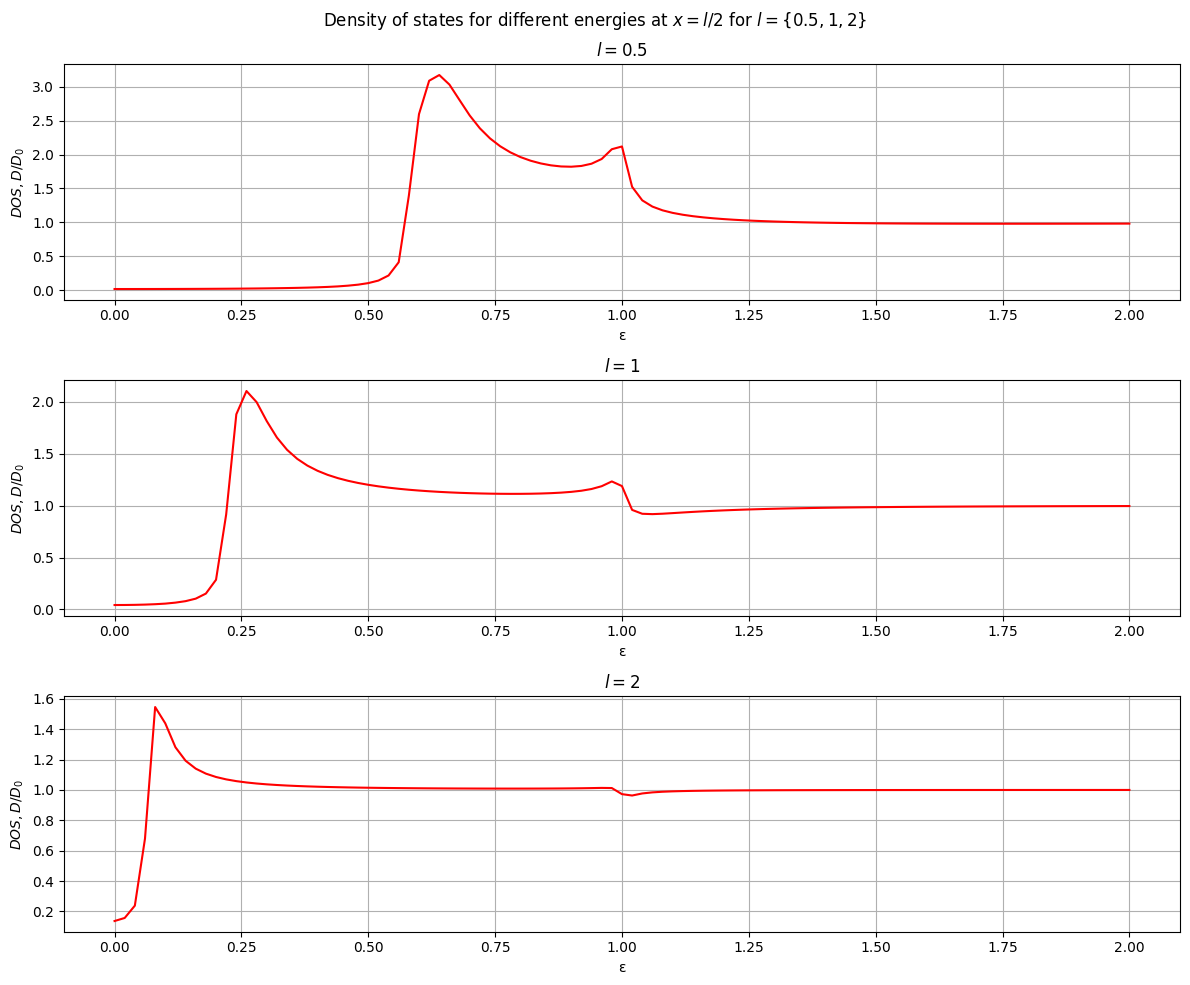

In [19]:
def DOS_diff_eps(ε_arr, x_init, y_init,l,m,φ_L=0,φ_R=0):
    DOS_at_mid=np.zeros(ε_arr.size)
    sol_arr=np.zeros((32,m*ε_arr.size))
    for i in range (ε_arr.size): # Iterating through all εs
        DOS, sol=density_of_states(fun_for_bvp, bc_for_bvp_2i, x_init, y_init, ε_arr[i],l,φ_L=φ_L,φ_R=φ_R) #Calculating DOS for each ε
        DOS_at_mid[i]=DOS[int(x_init.size/2)] #Take value in the midddle
        vecs=sol.y[:,0:m]
        y_init=vecs.copy() # Solution is new inital guess for the next ε
        sol_arr[:,i*m:(m+i*m)]=vecs
    return DOS_at_mid, sol_arr

δ=0.01
m=101
l_arr=np.array([0.5,1,2]) # l values to test
ε_arr=np.linspace(0,2,m)[::-1] # ε array going from 2 to 0
y_init=np.zeros((32,m)) # Initial guess (for eps=2)

# Plotting
fig_2k, ax_2k=plt.subplots(nrows=3, ncols=1, figsize=(12,10))
plt.subplots_adjust(hspace=0.5)
fig_2k.suptitle("Density of states for different energies at $x=l/2$ for $l=\{0.5,1,2\}$")
x_init=np.linspace(0,l_arr[0],m) # Position
DOS_at_mid05,sol_arr05=DOS_diff_eps(ε_arr, x_init, y_init,l_arr[0],m)

ax_2k[0].set_title("$l=0.5$")
ax_2k[0].plot(ε_arr,DOS_at_mid05,color="red")
ax_2k[0].set_ylabel("$DOS, D/D_0$")
ax_2k[0].set_xlabel("ε")
ax_2k[0].grid()

x_init=np.linspace(0,l_arr[1],m) # Position
DOS_at_mid1,sol_arr1=DOS_diff_eps(ε_arr, x_init, y_init,l_arr[1],m)
ax_2k[1].set_title("$l=1$")
ax_2k[1].plot(ε_arr,DOS_at_mid1,color="red")
ax_2k[1].set_ylabel("$DOS, D/D_0$")
ax_2k[1].set_xlabel("ε")
ax_2k[1].grid()

x_init=np.linspace(0,l_arr[2],m) # Position
DOS_at_mid2,sol_arr2=DOS_diff_eps(ε_arr, x_init, y_init,l_arr[2],m)
ax_2k[2].set_title("$l=2$")
ax_2k[2].plot(ε_arr,DOS_at_mid2,color="red")
ax_2k[2].set_ylabel("$DOS, D/D_0$")
ax_2k[2].set_xlabel("ε")
ax_2k[2].grid()

plt.tight_layout()
plt.show()

The three plots we see here resemble figure $1$ in the project description if it were only plotted for positive energies, i.e. the plots are similar the right half of the symmetric function in figure $1$. The two key differences between the plots in this task (metal gaining superconductor properties) and the plot in figure $1$ (an actual superconductor) are the size of the gap in the density of states (DOS), and the bumps at $\varepsilon=1$. From now on, we will only consider energies $\varepsilon>0$, even though figure $1$ also includes density of states for negative energies.

According to figure $1$, a real superconductor would have a gap in the density of states for the energies $\varepsilon \in [0,1]$, where no electrons other than Cooper pairs can live. Since superconductor properties leak into the normal metal, it gets an equivalent gap, though smaller than that of a true superconductor. As we can see from the plots in this task, the minigap of the metal is located at approximately $\varepsilon \in [0,0.5]$ for $l=0.5$, $\varepsilon \in [0,0.15]$ for $l=1$, and $\varepsilon \in [0,0.05]$ for $l=2$. We conclude that the minigap shrinks with increasing $l$. This is likely because a longer piece of metal is less affected by the superconductors on either side. As we saw in the plot in task 2j, the closer one is to a superconductor, the more it affects the density of states $D(x,\varepsilon)/D_0$ within the normal metal. Thus, when the normal metal lies between two superconductors, $D(x,\varepsilon)/D_0$ is least affected in the middle of the metal, i.e. at $x=l/2$. As specified in the task, the density of states plotted here is what one finds at $x=l/2$ for different energies. It makes sense, therefore, that increasing the distance to both superconductors would make the metal less receptive to superconductor properties at that point.

In all three plots we also see a bump in the density of states at $\varepsilon=1$, where DOS momentarily increases before decreasing to even lower values than it had before the bump. For $l=2$, however, it seems to be the opposite; DOS decreases in $\varepsilon=1$ before slightly increasing again for higher energies. Considering that the bump for $l=2$ is so small and the change in the DOS-value so insignificant, one could possibly attribute this to rounding error. Still, the three plots show that the height (or depth) of the bump decreases with increasing $l$, which could again imply that this phenomenon has something to do with the proximity of superconductors. 
One possible explanation for the bumps could be that this is yet another underdeveloped superconductor property of the normal metal. From figure $1$ in the project description we see that the superconductor gap has a tall "wall" at $\varepsilon=1$. While the minigap in the normal metal has this wall at a lower energy, the bump at $\varepsilon=1$ could be some sort of residue, a weak trace of what should have been there had the metal been an actual superconductor. In the plots we also see that $D(x,\varepsilon)/D_0$ rapidly converges to $1$ (which is the density of states in a normal metal) after the bump. Therefore, the bump could also mark the minimum energy required to observe the Josephson effect.

### 2l)

C:\Users\WIlma\AppData\Local\Temp\ipykernel_1704\907732586.py:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ind=int(np.where(ε_arr==ε)[0])


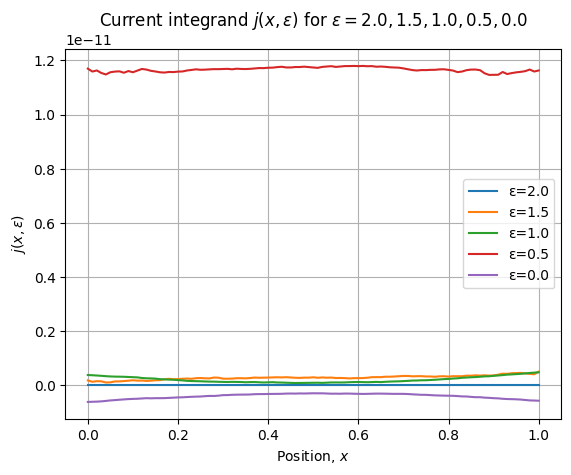

In [20]:
def current_int(sol,m): 
    jint_arr=np.zeros(m)

    I=np.array([[1,0],[0,1]]).astype(complex) # Identity matrix
    Zero=np.array([[0,0],[0,0]]).astype(complex) # Zero matrix
    rho_3=np.block([[I,Zero],[Zero,-I]]) # 4x4 matrix, specified in project desc.

    for i in range (m):                  # Iterating through every vector in solution
        ɣ, ɣ_tilde, ω, ω_tilde=v_to_matrices(sol[:,i]) # Unpacking each vector into four matrices
        
        # Defining N matrices:
        N=N_matrix(ɣ,ɣ_tilde)
        dxN=N@(ω@ɣ_tilde+ɣ@ω_tilde)@N

        N_tilde=N_tilde_matrix(ɣ,ɣ_tilde)
        dxN_tilde=N_tilde@(ω_tilde@ɣ+ɣ_tilde@ω)@N_tilde

        # Defining each element of Green function and putting them together into one matrix:
        green00=2*N-I
        green01=2*N@ɣ
        green10=-2*N_tilde@ɣ_tilde
        green11=-2*N_tilde+I
        Green=np.block([[green00,green01],[green10,green11]])

        dxgreen01=N@ω+dxN@ɣ
        dxgreen10=-N_tilde@ω_tilde-dxN_tilde@ɣ_tilde
        dxGreen=np.block([[dxN,dxgreen01],[dxgreen10,-dxN_tilde]])
        jint=np.real(np.trace(rho_3@(Green@dxGreen-dxGreen@Green)))
        jint_arr[i]=jint
    return jint_arr

m=101
l=1
ε_arr=np.linspace(0,2,m)[::-1] # ε array going from 2 to 0
eps_of_int=np.array([2.0,1.5,1.0,0.5,0.0])
x_arr=np.linspace(0,l,m)
y_init=np.zeros((32,m)) # Initial guess (for eps=2)
DOS_at_mid1,sol_arr1=DOS_diff_eps(ε_arr, x_arr, y_init,l,m) #This can be deleted when in jupyter notebooks

plt.title("Current integrand $j(x,ε)$ for $ε={2.0,1.5,1.0,0.5,0.0}$")
for ε in eps_of_int:
    ind=int(np.where(ε_arr==ε)[0])
    jint=current_int(sol_arr1[:,m*ind:(m+m*ind)],m) # This is from 2k
    plt.plot(x_arr,jint,label="ε="+str(ε))
plt.ylabel("$j(x,ε)$")
plt.xlabel("Position, $x$")
plt.grid()
plt.legend()
plt.show()

This plot confirms that the current integrand $j(x,\varepsilon)$ is practically zero for all the tested $\varepsilon$, and based on this sample we make the assumption that it is zero for all other $\varepsilon$ as well. The figure shows slight differences in the current inegrand for different $\varepsilon$, but considering that the scale of the $y$ -axis is $10^{-11}$, the differences are minimal and are likely a result of computational rounding errors.

### 2m)

<>:14: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\D'
C:\Users\WIlma\AppData\Local\Temp\ipykernel_1704\3835348317.py:14: SyntaxWarning: invalid escape sequence '\D'
  plt.title("Current integrand as a function of energy $\Delta \Phi=1$")


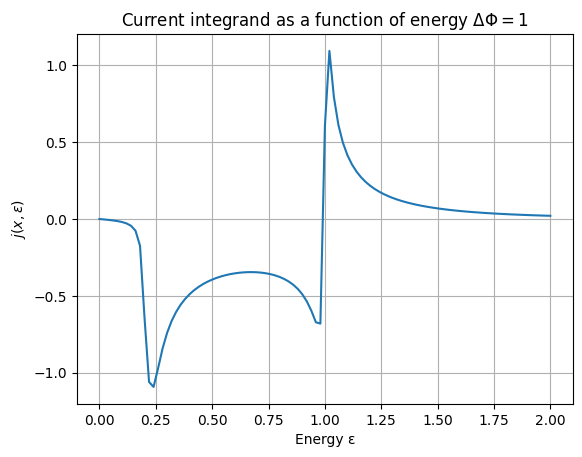

In [21]:
l=1
m=101
ε_arr=np.linspace(0,2,m)[::-1] # ε array going from 2 to 0
x_init=np.linspace(0,l,m)
y_init=np.zeros((32,m)) # Initial guess (for eps=2)
DOS_at_mid1,sol_arr1=DOS_diff_eps(ε_arr, x_init, y_init,l,m,φ_L=1,φ_R=0)
sol_midx=np.zeros((32,m))

for i in range(m):
    sol_midx[:,i]=sol_arr1[:,int(m/2)+i*m]

jint=current_int(sol_midx,m)
plt.plot(ε_arr,jint)
plt.title("Current integrand as a function of energy $\Delta \Phi=1$")
plt.ylabel("$j(x,ε)$")
plt.xlabel("Energy ε")
plt.grid()
plt.show()

The figure shows the current integrand $j(x, \varepsilon)$ in the middle of the normal metal ($x=l/2$), as a function of the normalized energy, $\varepsilon$.

In contrast to task 2l, the phase difference $\Delta \Phi=\Phi_L - \Phi_R$ here is greater than zero. Since the supercurrent is proportional to the phase difference, it is to be expected that the current integrand $j(x,\varepsilon)>0$ when $\Phi_L-\Phi_R>0$.
From this plot we also see that the current varies with energy and that, when the phase difference is $1$, it switches direction at $\varepsilon=1$.
The current intagrand as a function of position is the same as the current density seen from a one-dimensional point of view. The current density is conserved, i.e. constant, for all positions because the Cooper pair at a certain $x$-coordinate need to move away to make space for a new Cooper pair to settle in that position. There cannot be any accumulation of Cooper pairs anywhere in the metal, and thus $j(x;\varepsilon)$ is constant.

### 2n)

<>:20: SyntaxWarning: invalid escape sequence '\D'
<>:20: SyntaxWarning: invalid escape sequence '\D'
C:\Users\WIlma\AppData\Local\Temp\ipykernel_1704\368885910.py:20: SyntaxWarning: invalid escape sequence '\D'
  ax_2n.set_xlabel("Phase difference, $\Delta \Phi$")


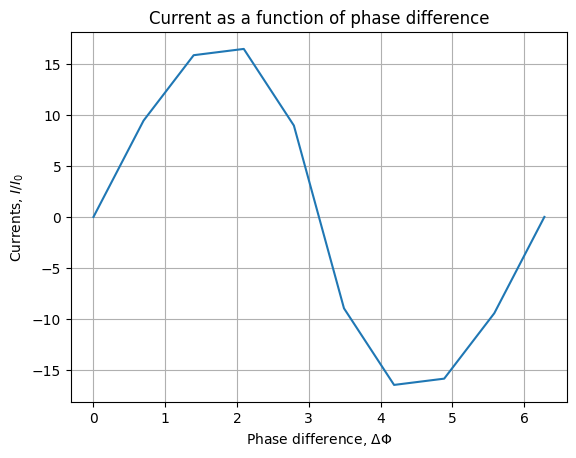

In [22]:
# φ_R should be 0 all the time
φ_L_arr=np.linspace(0,2*np.pi,10)
l=1
m=101
ε_arr_2n=np.linspace(0,2,m)[::-1] # ε array going from 2 to 0
x_init_2n=np.linspace(0,l,m)
y_init_2n=np.zeros((32,m)) # Initial guess (for eps=2)

j_arr = np.zeros(len(φ_L_arr))
for i in range(len(φ_L_arr)):
    DOS_at_mid1_2n,sol_arr1_2n=DOS_diff_eps(ε_arr_2n, x_init_2n, y_init_2n,l,m,φ_L_arr[i],φ_R=0)
    sol_midx_2n=sol_arr1_2n[:,int(m/2)::m]
    jint_2n=current_int(sol_midx_2n,m)
    j_arr[i] = - simpson(jint_2n)

fig, ax_2n = plt.subplots()
ax_2n.plot(φ_L_arr,j_arr)
ax_2n.set_title("Current as a function of phase difference")
ax_2n.set_ylabel("Currents, $I/I_0$")
ax_2n.set_xlabel("Phase difference, $\Delta \Phi$")
ax_2n.grid()
plt.show()

The plot shows a simulation of the Josephson effect, that a current is caused by the phase difference between the superconductors on each side of the normal metal.

We see that the graph of $I(\Delta \Phi)/I_0$ resembles a sinus-function. When the phase difference $\Delta \Phi$ between the superconductors is zero, there is no current in the normal metal. As $\Delta \Phi$ increases the current becomes larger and larger in one direction, until it reaches its maximum at about $\pi/4$. As $\Delta \Phi$ continues to grow, the current slowly decreases, becomes zero at $\Delta \Phi=\pi$, and then starts to flow in the opposite direction for $\Delta \Phi>\pi$. At about $\Delta \Phi=3\pi/4$ the current reaches its maximum in this direction, before it again decreases until $I(2\pi)=0$.

These observations indicate that the current induced in a normal metal due to phase differences in adjacent superconductors is $2\pi$-periodic. Indeed, the superconductor order parameter $\Delta$ is proportional to the $2\pi$-periodic function $e^{i\Phi}=\cos \Phi+i\sin \Phi$. Additionally, one can see from the plot that the Cooper-pair current $I$ can be more than $15$ times greater than $I_0$